## 0. Описание задачи
Таблица содержит данные о 46405 автомобилях и 9 признаков:

- `make` - марка авто
- `model` - модель авто
- `mileage` - пробег автомобиля
- `fuel` - тип топлива двигателя
- `gear` - тип трансмиссии
- `offerType` - поддерженная машина или нет
- `price` - цена машины
- `hp` - мощность машины (в лошадях)
- `year` - год выпуска машины

Постановка задачи:

Требуется предсказать категориальный признак `price`, представленный в числовом виде (стоимость машины) по остальным признакам. Это задача классификации.

## Библиотеки:

In [438]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

### Загружаем данные:

In [439]:
data = pd.read_csv("data.csv")

In [440]:
for el in range(len(data['price'])):
    if 5000 >= data['price'][el]:
        data['price'][el] = 'до 5000'
    elif 5001 <= data['price'][el] <= 10000:
        data['price'][el] = 'от 5000 до 10000'
    elif 10001 <= data['price'][el] <= 15000:
        data['price'][el] = 'от 10000 до 15000'
    elif 15001 <= data['price'][el] <= 20000:
        data['price'][el] = 'от 15000 до 20000'
    elif 20001 <= data['price'][el] <= 25000:
        data['price'][el] = 'от 20000 до 25000'
    elif 25001 <= data['price'][el] <= 30000:
        data['price'][el] = 'от 25000 до 30000'
    elif data['price'][el] >= 30001:
        data['price'][el] = 'от 30000'

C:\Users\Sid\AppData\Local\Temp\ipykernel_13556\219902646.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'][el] = 'от 5000 до 10000'


Этот метод отображает первые строки (по умолчанию, 5 строк) таблицы:

In [441]:
data.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,от 5000 до 10000,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,от 5000 до 10000,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,от 5000 до 10000,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,от 5000 до 10000,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,от 5000 до 10000,156.0,2011


Метод data.tail() отображает последние строки (по умолчанию, 5 строк) таблицы:

In [442]:
data.tail()

,mileage,make,model,fuel,gear,offerType,price,hp,year
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,от 10000 до 15000,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,от 10000 до 15000,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,от 10000 до 15000,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,от 10000 до 15000,71.0,2021
46404,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,от 10000 до 15000,71.0,2021


C помощью метода columns можем получить имена признаков:

In [443]:
data.columns

Index(['mileage', 'make', 'model', 'fuel', 'gear', 'offerType', 'price', 'hp',
       'year'],
      dtype='object')

Анализ признаков: 


In [444]:
data.index

RangeIndex(start=0, stop=46405, step=1)

In [445]:
data.dtypes

mileage        int64
make          object
model         object
fuel          object
gear          object
offerType     object
price         object
hp           float64
year           int64
dtype: object

Столбцы `make`, `model`, `fuel`, `gear`, `offerType` содержат категориальные значения. Пока они имеют тип `'Object`. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [446]:
data['make'] = data['make'].astype('category')
data['model'] = data['model'].astype('category')
data['fuel'] = data['fuel'].astype('category')
data['gear'] = data['gear'].astype('category')
data['offerType'] = data['offerType'].astype('category')

In [447]:
data.dtypes

mileage         int64
make         category
model        category
fuel         category
gear         category
offerType    category
price          object
hp            float64
year            int64
dtype: object

### Доступ к отдельным элементам и выделение подтаблиц (slice)

In [448]:
data.at [3, 'offerType']

'Used'

In [449]:
data.iat [4,4]

'Manual'

In [450]:
data['make']

0               BMW
1        Volkswagen
2              SEAT
3           Renault
4           Peugeot
            ...    
46400          Fiat
46401          Fiat
46402          Fiat
46403          Fiat
46404          Fiat
Name: make, Length: 46405, dtype: category
Categories (77, object): ['9ff', 'Abarth', 'Aixam', 'Alfa', ..., 'Volkswagen', 'Volvo', 'Zhidou', 'smart']

In [451]:
data.loc[[2,3,5,189,235], ['make', 'year', 'price']]

,make,year,price
2,SEAT,2011,от 5000 до 10000
3,Renault,2011,от 5000 до 10000
5,Toyota,2011,от 5000 до 10000
189,Volkswagen,2020,от 30000
235,Toyota,2012,от 5000 до 10000


In [452]:
data.iloc[[2,3,5], [1,2,3]]

,make,model,fuel
2,SEAT,Exeo,Gasoline
3,Renault,Megane,Gasoline
5,Toyota,Auris,Electric/Gasoline


In [453]:
data.loc[[2, 5], :]

,mileage,make,model,fuel,gear,offerType,price,hp,year
2,149300,SEAT,Exeo,Gasoline,Manual,Used,от 5000 до 10000,160.0,2011
5,147000,Toyota,Auris,Electric/Gasoline,Automatic,Used,от 5000 до 10000,99.0,2011


### Доступ по булевой маске

In [454]:
df = data.iloc[:4, 2:9]
df

,model,fuel,gear,offerType,price,hp,year
0,316,Diesel,Manual,Used,от 5000 до 10000,116.0,2011
1,Golf,Gasoline,Manual,Used,от 5000 до 10000,122.0,2011
2,Exeo,Gasoline,Manual,Used,от 5000 до 10000,160.0,2011
3,Megane,Gasoline,Manual,Used,от 5000 до 10000,110.0,2011


In [455]:
df.loc[[True, True, False, True], [False, True, True, True, True, True, False]]

,fuel,gear,offerType,price,hp
0,Diesel,Manual,Used,от 5000 до 10000,116.0
1,Gasoline,Manual,Used,от 5000 до 10000,122.0
3,Gasoline,Manual,Used,от 5000 до 10000,110.0


In [456]:
df[[False, True, False, True]]

,model,fuel,gear,offerType,price,hp,year
1,Golf,Gasoline,Manual,Used,от 5000 до 10000,122.0,2011
3,Megane,Gasoline,Manual,Used,от 5000 до 10000,110.0,2011


In [457]:
df.loc[df.year  == 2011, ]

,model,fuel,gear,offerType,price,hp,year
0,316,Diesel,Manual,Used,от 5000 до 10000,116.0,2011
1,Golf,Gasoline,Manual,Used,от 5000 до 10000,122.0,2011
2,Exeo,Gasoline,Manual,Used,от 5000 до 10000,160.0,2011
3,Megane,Gasoline,Manual,Used,от 5000 до 10000,110.0,2011


## 2. Боремся с выбросами (outliers)

Понятно, что цена машины зависит от множества признаков. Один из таких признаков: количество лошадиных сил.
Построим поэтому диаграмму рассеивания для двух признаков: `hp` и `price`.

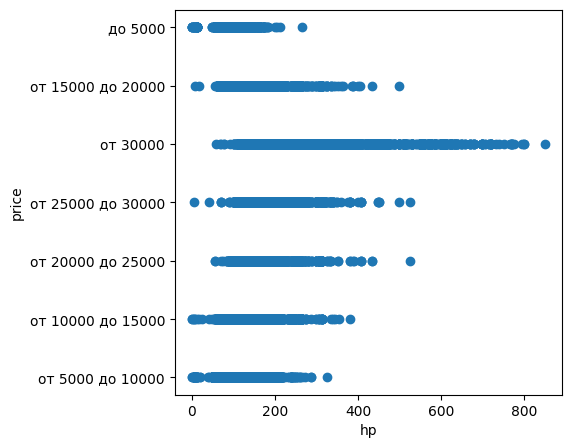

In [458]:
plt.scatter(data['hp'], data['price'])
plt.xlabel("hp")
plt.ylabel("price")
pass

In [459]:
data['hp'].max()

850.0

In [460]:
data['hp'].min()

1.0

Так же понятно, что цена зависит от пробега автомобиля.
Построим поэтому диаграмму рассеивания для двух признаков: `mileage` и `price`.

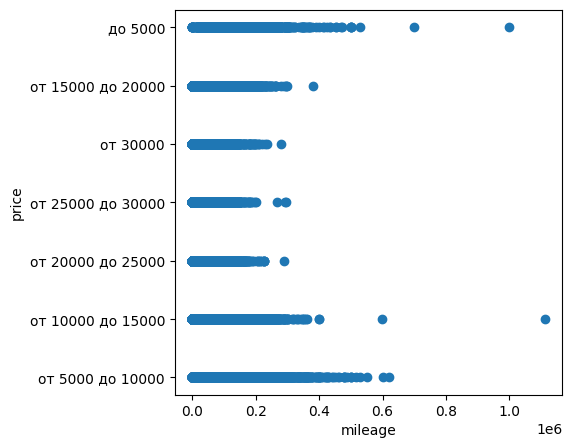

In [461]:
plt.scatter(data['mileage'], data['price'])
plt.xlabel("mileage")
plt.ylabel("price")
pass

In [462]:
data['mileage'].min()

0

In [463]:
data['mileage'].max()

1111111

Построим диаграмму рассеивания для двух признаков: year и price.

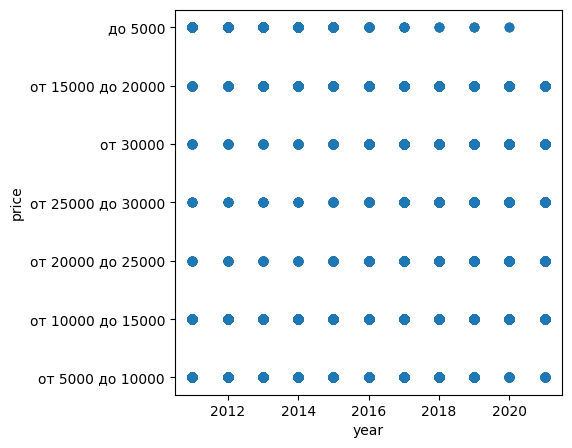

In [464]:
plt.scatter(data['year'], data['price'])
plt.xlabel("year")
plt.ylabel("price")
pass

In [465]:
data['year'].min()

2011

In [466]:
data['year'].max()

2021

Построим диаграмму рассеивания для двух признаков: offerType и price.

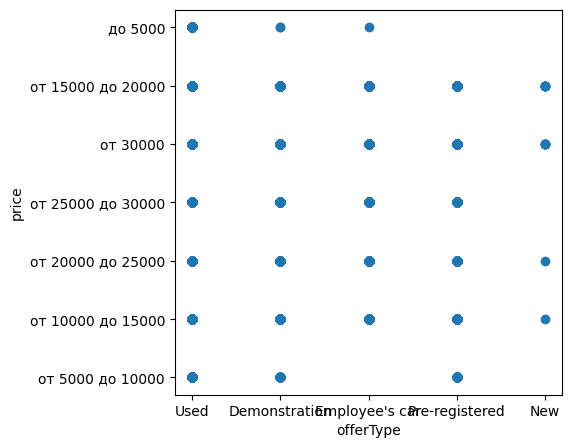

In [467]:
plt.scatter(data['offerType'], data['price'])
plt.xlabel("offerType")
plt.ylabel("price")
pass

Мы видим точки соответствующие машинам с чрезмерно большим или с слишком малым количеством лошадиных сил и чрезмерным пробегом. Это *выбросы* (*outliers*) - объекты, значения признаков которых сильно отличаются от признаков основной массы объектов, сильно выпадающих из общей картины. Возможно, это ошибки в данных. В любом случае выбросы, как правило, мешают построить хорошее решающее правило и их рекомендуется выбрасывать.

Для обнаружения выбросов найдем квантили для признаков `hp`, `mileage`:

In [468]:
data['hp'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     58.0
0.010     60.0
0.050     67.0
0.100     69.0
0.500    116.0
0.900    204.0
0.950    265.0
0.990    450.0
0.995    551.0
Name: hp, dtype: float64

In [469]:
data['mileage'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005         5.00
0.010         5.00
0.050        15.00
0.100      1550.00
0.500     60000.00
0.900    155000.00
0.950    187000.00
0.990    259633.64
0.995    297000.00
Name: mileage, dtype: float64

Мы видим, например, что $99.9\%$ всех значений признака `'hp'` находится в диапазоне от $58.0$ до $551.0$ л.с. (это значения квантилей, соответствующих уровням $0.005$ и $0.995$ соотвтетственно)

$99.9\%$ всех значений признака `'mileage'` находится в диапазоне от $5.0$ до $297000.0$

Удалим все объекты лежащие за этими границами:

In [470]:
rows_to_drop = data[
    (data['hp'] < data['hp'].quantile(0.005)) | (data['hp'] > data['hp'].quantile(0.995)) |
    (data['mileage'] < data['mileage'].quantile(0.005)) | (data['mileage'] > data['mileage'].quantile(0.995))].index
data = data.drop(rows_to_drop)
data.shape

(45608, 9)

In [471]:
rows_to_drop

Int64Index([   12,    26,    84,   365,   406,   409,   416,   436,   450,
              614,
            ...
            46102, 46123, 46264, 46273, 46274, 46277, 46278, 46332, 46333,
            46353],
           dtype='int64', length=797)

In [472]:
data['price'].value_counts()

от 5000 до 10000     16859
от 10000 до 15000     9927
от 30000              5056
от 15000 до 20000     4713
до 5000               3537
от 20000 до 25000     2989
от 25000 до 30000     2527
Name: price, dtype: int64

In [473]:
data.count

<bound method DataFrame.count of        mileage        make   model               fuel    gear       offerType  \
0       235000         BMW     316             Diesel  Manual            Used   
1        92800  Volkswagen    Golf           Gasoline  Manual            Used   
2       149300        SEAT    Exeo           Gasoline  Manual            Used   
3        96200     Renault  Megane           Gasoline  Manual            Used   
4       156000     Peugeot     308           Gasoline  Manual            Used   
...        ...         ...     ...                ...     ...             ...   
46400       99        Fiat     500  Electric/Gasoline  Manual  Pre-registered   
46401       99        Fiat     500  Electric/Gasoline  Manual  Pre-registered   
46402       99        Fiat     500  Electric/Gasoline  Manual  Pre-registered   
46403       99        Fiat     500  Electric/Gasoline  Manual  Pre-registered   
46404       99        Fiat     500  Electric/Gasoline  Manual  Pre-registere

Мы избавились от 797 выбросов.

## 3. Визуализация и описательная статистика

Визуализация и описательная статистика - важные этапы анализа данных.
Сводную информацию о признаках можем получить, вызвав метод `describe`:

In [474]:
data.describe()

,mileage,hp,year
count,45608.000000,45583.000000,45608.000000
mean,70289.681131,130.985126,2015.998553
std,58750.374868,67.605161,3.143333
min,5.000000,58.000000,2011.000000
25%,20203.750000,86.000000,2013.000000
50%,60000.000000,116.000000,2016.000000
75%,105000.000000,150.000000,2019.000000
max,297000.000000,551.000000,2021.000000


Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.

<AxesSubplot: xlabel='price', ylabel='count'>

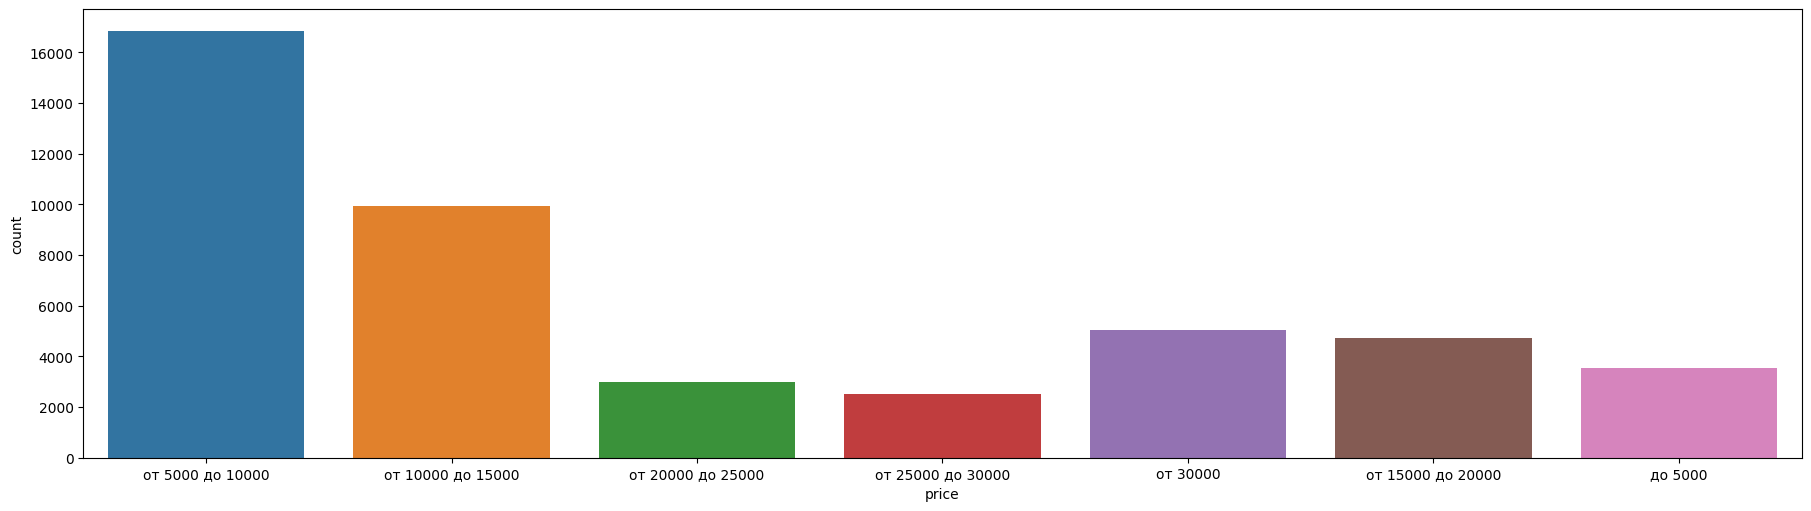

In [475]:
fig, ax = plt.subplots(1,1, figsize=(18,5), constrained_layout=True)

sns.countplot(x ='price', data = data, ax=ax)

Анализируя графики нетрудно заметить, что меньше всего в датасете объектов с признаком `price` от 20000 до 25000 и от 25000 до 30000, а больше всего от 5000 до 10000 и от 10000 до 15000.

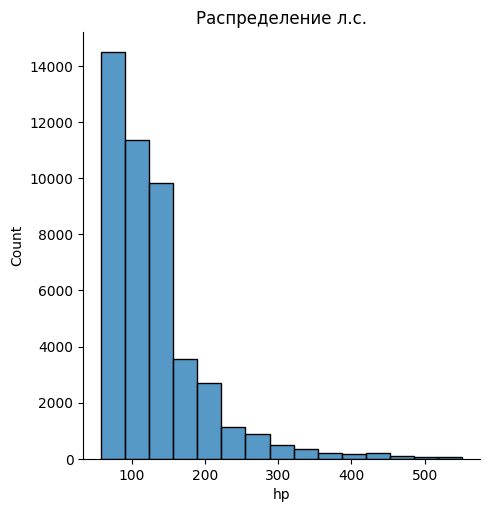

In [476]:
sns.displot(data['hp'], bins = 15)
plt.title('Распределение л.c.')
pass

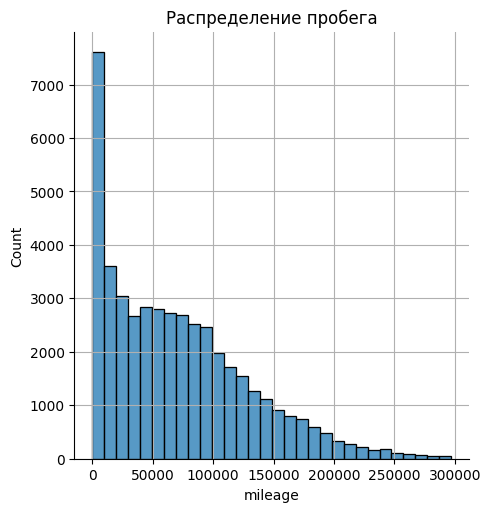

In [477]:
sns.displot(data['mileage'], bins=30)
plt.grid()
plt.title('Распределение пробега')
pass

Признак `mileage` принимает большой диапозон значений.

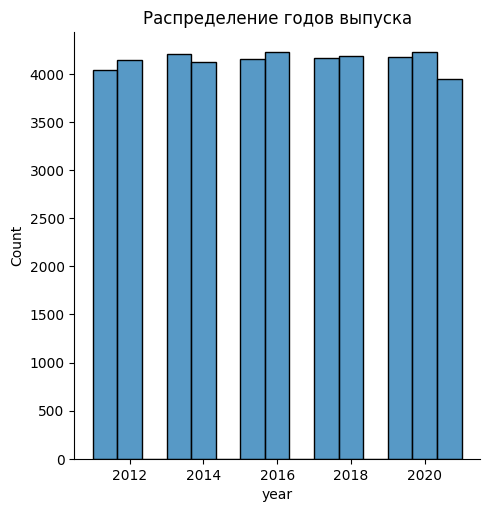

In [478]:
sns.displot(data['year'], bins = 15)
plt.title('Распределение годов выпуска')
pass

Получим информацию о категориальных:

In [479]:
data.describe(include=['category'])

,make,model,fuel,gear,offerType
count,45608,45498,45608,45461,45608
unique,64,787,11,3,5
top,Volkswagen,Golf,Gasoline,Manual,Used
freq,6872,1486,28476,30102,39575


<AxesSubplot: xlabel='gear', ylabel='count'>

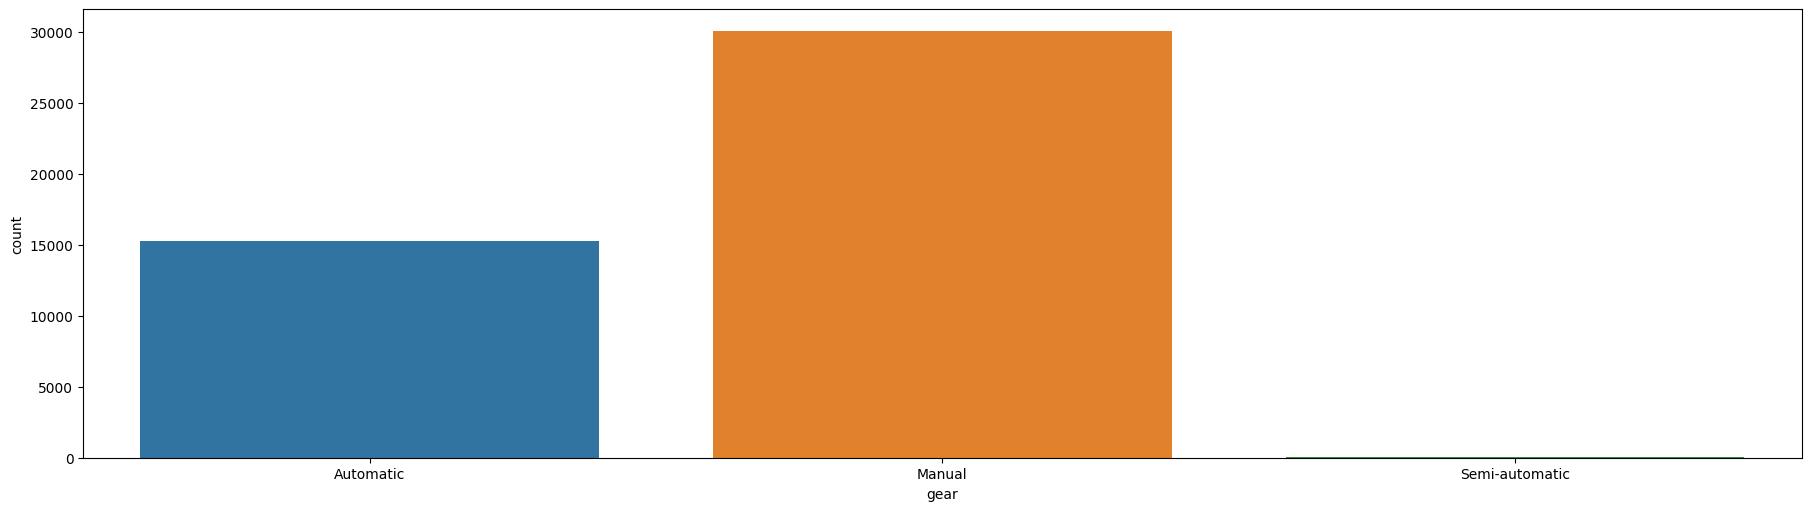

In [480]:
fig, ax = plt.subplots(1,1, figsize=(18,5), constrained_layout=True)

sns.countplot(x ='gear', data = data, ax=ax)

<AxesSubplot: xlabel='fuel', ylabel='count'>

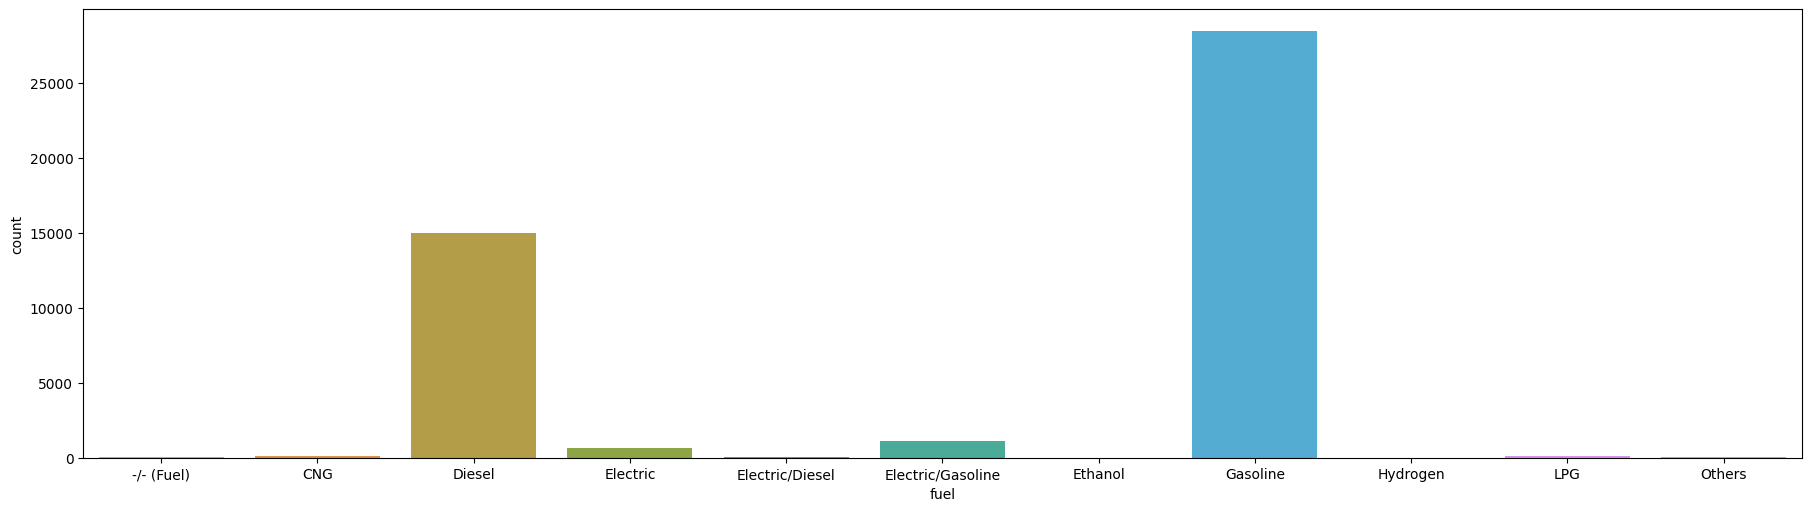

In [481]:
fig, ax = plt.subplots(1,1, figsize=(18,5), constrained_layout=True)

sns.countplot(x ='fuel', data = data, ax=ax)

Анализируя графики нетрудно заметить, что меньше всего в датасете объектов с признаком `gear` semi-automatic, а больше всего с manual, а с признаком `fuel` меньше всего ethanol и hydrogen, а больше всего gasoline и diesel

### Построим все возможные диаграммы рассеивания для каждой пары переменных:

In [482]:
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)

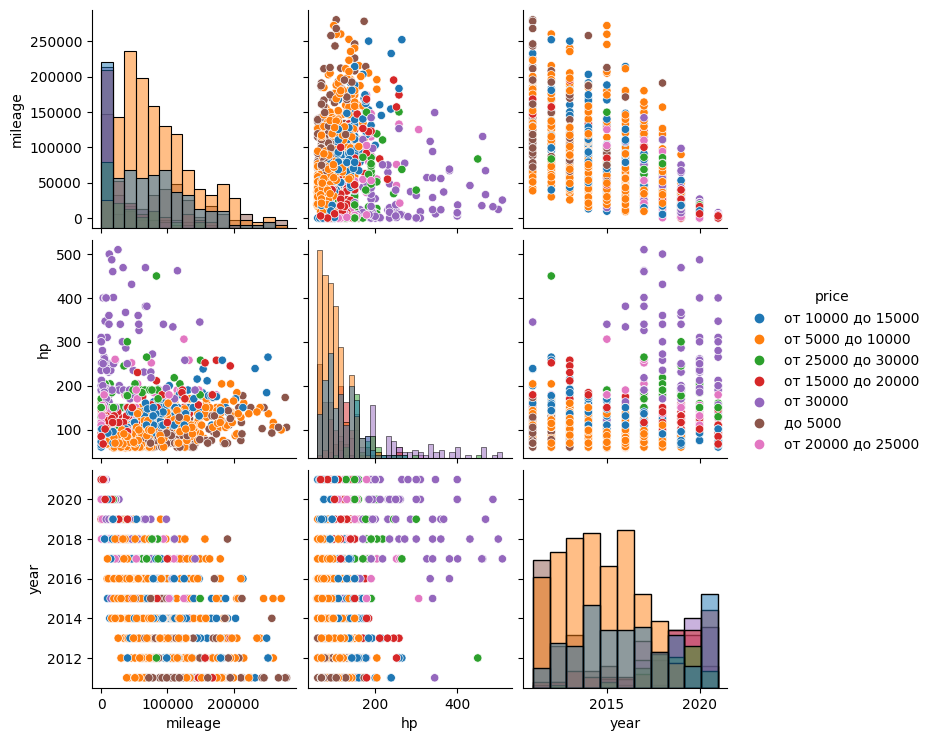

In [483]:
temp = data[['make', 'model', 'mileage',
       'fuel', 'gear', 'offerType', 'price', 'hp', 'year']]

sns.pairplot(temp.iloc[random_subset], diag_kind='hist', hue= 'price')

### Ящик с усами

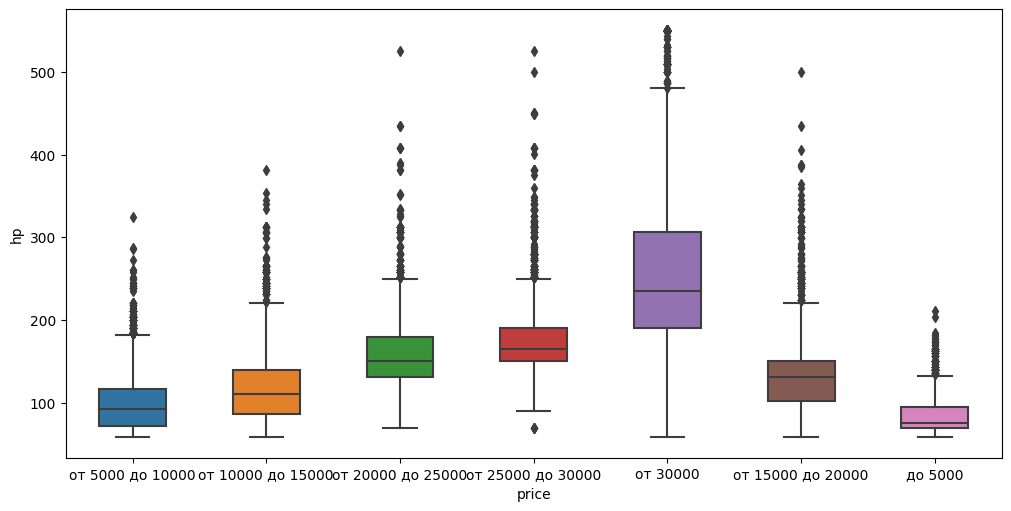

In [484]:
fig, ax = plt.subplots(1,1, figsize=(10,5), constrained_layout=True)

sns.boxplot(x="price", y="hp", data=data, ax=ax, width=0.5)
pass

### Скрипичный график

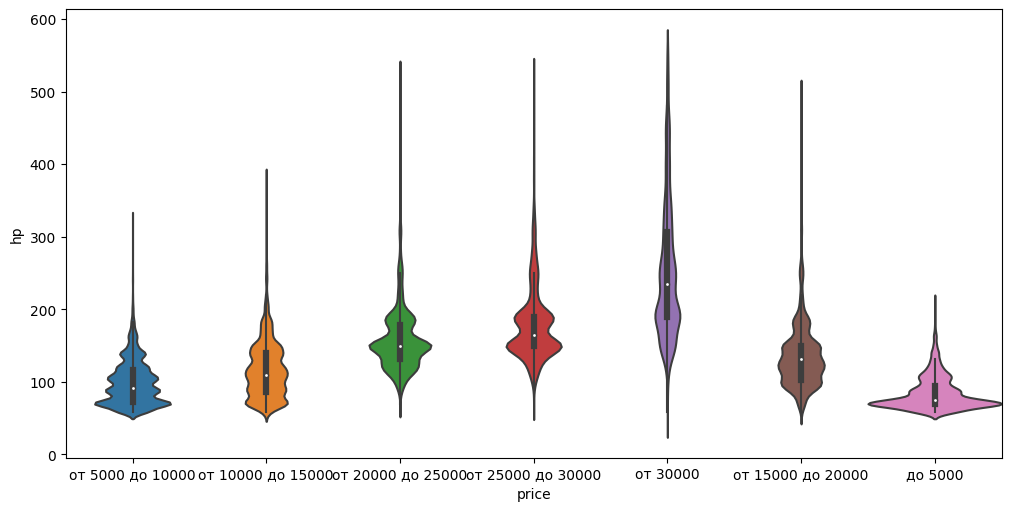

In [485]:
fig, ax = plt.subplots(1,1, figsize=(10,5), constrained_layout=True)

sns.violinplot(x="price", y="hp", data=data, ax=ax, width=1)
pass

### Корреляционная матрица

In [486]:
corr_mat = data.corr()
corr_mat

,mileage,hp,year
mileage,1.000000,-0.002342,-0.700743
hp,-0.002342,1.000000,0.169985
year,-0.700743,0.169985,1.000000


Удобно использовать визуальный образ этой матрицы. Чем ярче ячейка, тем больше по абсолютной величине коэффициент корреляции:

<AxesSubplot: >

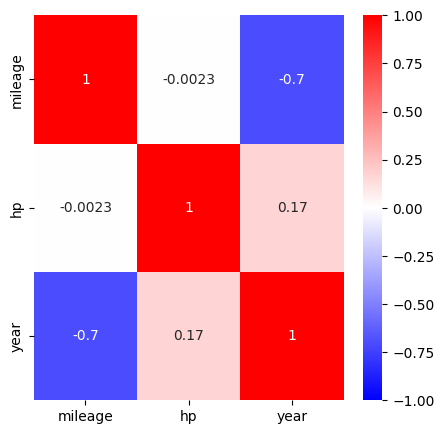

In [487]:
plt.rcParams['figure.figsize'] = (5, 5)

sns.heatmap(corr_mat, center=0, annot=True, cmap='bwr', vmin=-1, vmax=1,
        xticklabels=corr_mat.columns,
        yticklabels=corr_mat.columns)

In [488]:
corr_mat > 0.5

,mileage,hp,year
mileage,True,False,False
hp,False,True,False
year,False,False,True


In [489]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending=False)

Series([], dtype: float64)

##  4. Заполнение пропущенных значений 

Пропущенные значения в таблице представлены значениями np.nan. Посмотрим, сколько пропущенных значений в каждом столбце матрицы:

In [490]:
data.isna().sum()

mileage        0
make           0
model        110
fuel           0
gear         147
offerType      0
price          0
hp            25
year           0
dtype: int64

С пропущенными значениями надо что-то сделать. Например, можно просто удалить строки с пропущенными значениями. В нашем случае это разумно, так как таких строк немного. В некоторых случаях можно удалить столбцы с пропущенными значениями. Однако если данных мало такие простые стратегии могут привести к тому, что данных станет вообще ничтожное количество.

Простая разумная стратегия - заполнить пропущенные значения средним или медианой (для количественных признаков) или модой (для номинальных признаков).

In [491]:
data = data.dropna(subset=['hp'])
data = data.dropna(subset=['model'])
data = data.dropna(subset=['gear'])

In [492]:
data.isna().sum()  

mileage      0
make         0
model        0
fuel         0
gear         0
offerType    0
price        0
hp           0
year         0
dtype: int64

## 5. Векторизация категориальных признаков

In [493]:
data.describe()

,mileage,hp,year
count,45333.000000,45333.000000,45333.000000
mean,70326.224075,130.954448,2015.997926
std,58760.687537,67.480556,3.143484
min,5.000000,58.000000,2011.000000
25%,20255.000000,86.000000,2013.000000
50%,60000.000000,116.000000,2016.000000
75%,105000.000000,150.000000,2019.000000
max,297000.000000,551.000000,2021.000000


In [494]:
data.describe(include=['category'])

,make,model,fuel,gear,offerType
count,45333,45333,45333,45333,45333
unique,60,782,11,3,5
top,Volkswagen,Golf,Gasoline,Manual,Used
freq,6849,1483,28343,30038,39327


Удалим столбецы `make` и `model` и  поскольку в них много, а именно 60 и 782 уникальных значений.

In [495]:
data.drop(['make'], axis='columns', inplace=True)
data.drop(['model'], axis='columns', inplace=True)

Проведем векторизацию категориальных (номинальных) признаков:

In [496]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'category']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'category']
print('categorical_columns=', categorical_columns)
print('numerical_columns=', numerical_columns)

categorical_columns= ['fuel', 'gear', 'offerType']
numerical_columns= ['mileage', 'price', 'hp', 'year']


In [497]:
data_describe = data.describe(include=['category'])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print('binary_columns=', binary_columns)
print('nonbinary_columns=', nonbinary_columns)

binary_columns= []
nonbinary_columns= ['fuel', 'gear', 'offerType']


К небинарными признакам применим метод векторизации, 
который заключается в следующем.

Признак `j`, принимающий `s` значений, заменим на `s` признаков, принимащих значения `0` или `1`,
в зависимости от того, чему равно значение исходного признака `j`.

Например, в нашей задаче признак `gear` принимает 3 различных значений: 

In [498]:
data['gear'].unique()

['Manual', 'Automatic', 'Semi-automatic']
Categories (3, object): ['Automatic', 'Manual', 'Semi-automatic']

Заменим признак `gear` на 3 признака: gear_automatic, gear_manual, gear_semi_automatic.

Если признак `gear` принимает значение automatic, то признак gear_automatic равен 1, а все остальные равны 0.
Если признак `gear` принимает значение manual, то признак gear_manual равен 1, а все остальные равны 0. и т.д.

Такую векторизацию осуществляет в pandas метод get_dummies.

In [499]:
data[categorical_columns]

,fuel,gear,offerType
0,Diesel,Manual,Used
1,Gasoline,Manual,Used
2,Gasoline,Manual,Used
3,Gasoline,Manual,Used
4,Gasoline,Manual,Used
...,...,...,...
46400,Electric/Gasoline,Manual,Pre-registered
46401,Electric/Gasoline,Manual,Pre-registered
46402,Electric/Gasoline,Manual,Pre-registered
46403,Electric/Gasoline,Manual,Pre-registered


In [500]:
data_categorical = pd.get_dummies(data[nonbinary_columns])
print(data_categorical.columns)

Index(['fuel_-/- (Fuel)', 'fuel_CNG', 'fuel_Diesel', 'fuel_Electric',
       'fuel_Electric/Diesel', 'fuel_Electric/Gasoline', 'fuel_Ethanol',
       'fuel_Gasoline', 'fuel_Hydrogen', 'fuel_LPG', 'fuel_Others',
       'gear_Automatic', 'gear_Manual', 'gear_Semi-automatic',
       'offerType_Demonstration', 'offerType_Employee's car', 'offerType_New',
       'offerType_Pre-registered', 'offerType_Used'],
      dtype='object')


In [501]:
len(data_categorical.columns)

19

## 6. Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных. К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно нормализовать. Это можно делать разными способами. Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению.

In [502]:
numerical_columns = ['year', 'hp', 'mileage']

In [503]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,year,hp,mileage
count,45333.000000,45333.000000,45333.000000
mean,2015.997926,130.954448,70326.224075
std,3.143484,67.480556,58760.687537
min,2011.000000,58.000000,5.000000
25%,2013.000000,86.000000,20255.000000
50%,2016.000000,116.000000,60000.000000
75%,2019.000000,150.000000,105000.000000
max,2021.000000,551.000000,297000.000000


In [504]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [505]:
data_numerical.describe()

,year,hp,mileage
count,4.533300e+04,4.533300e+04,4.533300e+04
mean,3.131761e-14,1.655159e-16,-1.003127e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.589932e+00,-1.081118e+00,-1.196739e+00
25%,-9.536954e-01,-6.661837e-01,-8.521211e-01
50%,6.596326e-04,-2.216112e-01,-1.757335e-01
75%,9.550147e-01,2.822376e-01,5.900846e-01
max,1.591251e+00,6.224690e+00,3.857575e+00


## Соединяем все в одну таблицу

In [506]:
data = pd.concat((data_numerical, data_categorical, data['price']), axis = 1)
print(data.shape)

(45333, 23)


In [508]:
data.describe()

,year,hp,mileage,fuel_-/- (Fuel),fuel_CNG,fuel_Diesel,fuel_Electric,fuel_Electric/Diesel,fuel_Electric/Gasoline,fuel_Ethanol,...,fuel_LPG,fuel_Others,gear_Automatic,gear_Manual,gear_Semi-automatic,offerType_Demonstration,offerType_Employee's car,offerType_New,offerType_Pre-registered,offerType_Used
count,4.533300e+04,4.533300e+04,4.533300e+04,45333.000000,45333.000000,45333.000000,45333.000000,45333.000000,45333.000000,45333.000000,...,45333.000000,45333.000000,45333.000000,45333.000000,45333.000000,45333.000000,45333.000000,45333.000000,45333.000000,45333.000000
mean,3.131761e-14,1.655159e-16,-1.003127e-16,0.000441,0.002493,0.329164,0.013257,0.001169,0.024419,0.000044,...,0.002735,0.001037,0.336223,0.662608,0.001169,0.050361,0.024375,0.000221,0.057530,0.867514
std,1.000000e+00,1.000000e+00,1.000000e+00,0.021000,0.049865,0.469915,0.114376,0.034173,0.154349,0.006642,...,0.052229,0.032183,0.472421,0.472825,0.034173,0.218690,0.154213,0.014851,0.232855,0.339022
min,-1.589932e+00,-1.081118e+00,-1.196739e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-9.536954e-01,-6.661837e-01,-8.521211e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,6.596326e-04,-2.216112e-01,-1.757335e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.550147e-01,2.822376e-01,5.900846e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.591251e+00,6.224690e+00,3.857575e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 7. Отбор признаков 

Для классификации автомобилей по признаку обозначенному `price`, будем использовать все входные признаки.

### X и y

In [509]:
# X - вся таблица без столбца price
# y - только столбец price
X = data.drop('price', axis = 1)
y = data['price']
feature_names = X.columns

In [510]:
type(feature_names)

pandas.core.indexes.base.Index

In [511]:
feature_names

Index(['year', 'hp', 'mileage', 'fuel_-/- (Fuel)', 'fuel_CNG', 'fuel_Diesel',
       'fuel_Electric', 'fuel_Electric/Diesel', 'fuel_Electric/Gasoline',
       'fuel_Ethanol', 'fuel_Gasoline', 'fuel_Hydrogen', 'fuel_LPG',
       'fuel_Others', 'gear_Automatic', 'gear_Manual', 'gear_Semi-automatic',
       'offerType_Demonstration', 'offerType_Employee's car', 'offerType_New',
       'offerType_Pre-registered', 'offerType_Used'],
      dtype='object')

In [512]:
X = X.to_numpy()

In [513]:
y = y.to_numpy()

In [514]:
print(y)

['от 5000 до 10000' 'от 5000 до 10000' 'от 5000 до 10000' ...
 'от 10000 до 15000' 'от 10000 до 15000' 'от 10000 до 15000']


In [515]:
print(X.shape)
print(y.shape)
N, d = X.shape

(45333, 22)
(45333,)


In [516]:
type(X)

numpy.ndarray

In [517]:
type(y)

numpy.ndarray

## 8. Разбиваем на тренировочную и тестовую выборки

In [518]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# тестовая выборка - 30% данных
# random_state фиксирует split

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print(N_train, N_test)

print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

31733 13600
X_train:  (31733, 22)
X_test:   (13600, 22)
y_train:  (31733,)
y_test:   (13600,)


In [519]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import parallel_backend
from sklearn.metrics import f1_score
from tqdm import tqdm


y_train_pred = []
y_test_pred = []

iter_ = range(1, 37, 2)

for n_neig in tqdm(iter_):
    neigh = KNeighborsClassifier(n_neighbors=n_neig)
    neigh.fit(X_train, y_train)
    
    y_train_pred.append(neigh.predict(X_train))
    y_test_pred.append(neigh.predict(X_test))


100%|██████████| 18/18 [01:33<00:00,  5.20s/it]


'best number of neighbors: 15'

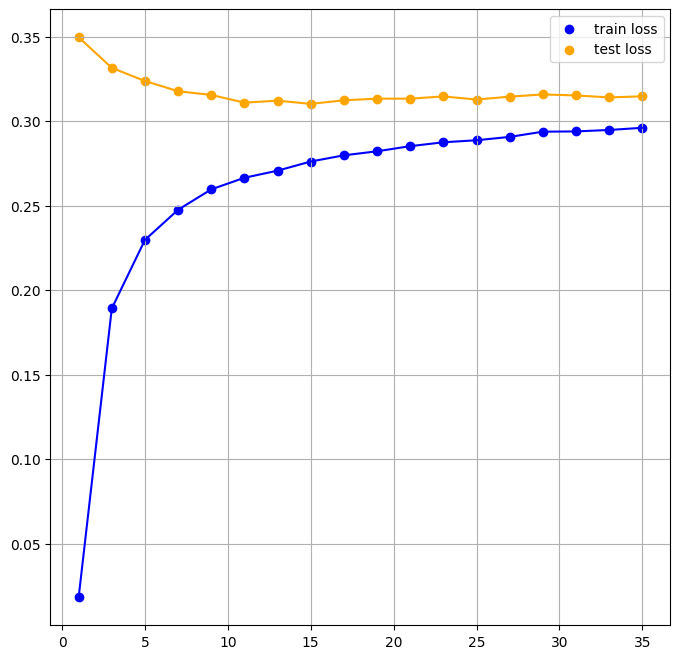

In [520]:
plt.rcParams['figure.figsize'] = (8, 8)

res_train = []
res_test = []

for i in range(len(iter_)):
    res_train.append(np.mean(y_train != y_train_pred[i]))
    res_test.append(np.mean(y_test != y_test_pred[i]))

plt.scatter(list(iter_)[::-1], res_train[::-1], color='blue', label='train loss')
plt.scatter(list(iter_)[::-1], res_test[::-1], color='orange', label='test loss')

plt.plot(list(iter_)[::-1], res_train[::-1], color='blue')
plt.plot(list(iter_)[::-1], res_test[::-1], color='orange')

plt.grid()
plt.legend()
f"best number of neighbors: {np.argmin(res_test)*2 + 1}"

In [521]:
neigh = KNeighborsClassifier(n_neighbors = 1)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)
f"error: {np.mean(y_test != y_pred):.3f}"

'error: 0.350'

Также построим матрицу ошибок(confusion matrix) для лучшего случая (один сосед):

In [522]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred[0])

array([[ 661,    7,    1,    0,    0,    0,  396],
       [  10, 1804,  339,   43,    8,    8,  719],
       [   0,  332,  710,  228,   51,   20,   46],
       [   0,   29,  221,  345,  189,   67,    4],
       [   0,   11,   57,  176,  321,  196,    2],
       [   0,    7,   15,   73,  211, 1214,    1],
       [ 450,  777,   48,    7,    1,    4, 3791]], dtype=int64)

На диагонали представлены "большие" значения, соответствующие тому, что метод сделал правильный прогноз.
Ошибок мало.

Из собранных предсказанний на тестовой выборки найдем оптимальное количество ближайших соседей.
Оптимальным является 1 ближайший сосед. Получили, что ошибка на тестовой выборке = 0.350, а ошибка на обучающей выборке = 0.0, что можно считать очень хорошим результатом.

### Random forest

In [523]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 250)
rf.fit(X_train, y_train)

y_train_predict = rf.predict(X_train)
print(y_train_predict)
y_test_predict = rf.predict(X_test)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print("err train = ", err_train)
print("err test = ", err_test)
print(confusion_matrix(y_test, y_test_predict))

['от 30000' 'от 10000 до 15000' 'от 5000 до 10000' ... 'от 10000 до 15000'
 'от 10000 до 15000' 'от 10000 до 15000']
err train =  0.016103110326789148
err test =  0.3199264705882353
[[ 685    3    1    0    0    0  376]
 [   7 1933  284   27    4    7  669]
 [   0  359  729  208   44   15   32]
 [   0   32  220  354  187   61    1]
 [   0   10   54  180  320  197    2]
 [   0    2   17   71  183 1248    0]
 [ 373  688   32    3    0    2 3980]]


### SVC

In [524]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

y_train_predict = svc.predict(X_train)
y_test_predict = svc.predict(X_test)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print("err train = ", err_train)
print("err test = ", err_test)
print(confusion_matrix(y_test, y_test_predict))

err train =  0.30750323007594615
err test =  0.3126470588235294
[[ 566    4    0    0    0    0  495]
 [   0 1936  213    7    0    0  775]
 [   0  455  729  154   18    7   24]
 [   0   47  292  306  129   80    1]
 [   0   10   73  198  216  264    2]
 [   0    5   18   66  130 1302    0]
 [ 206  568   11    0    0    0 4293]]


## Общие выводы